# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

#### Answer
Generally, a big advantage of a random forest classifier is that *ensemble* models are robust to noise from the individual decision trees (p. 88, Raschka, 2015). In addition, random forest does not tend to overfit as easily as decision trees (p. 96, Raschka, 2015).  
1. Increasing the number of decision trees (or `n_estimators`) will typically improve the performance of a random forest classifier, but increase the computational cost (p. 90, Raschka, 2015).
2. The `max_depth` specifies the amount of nodes in each individual tree. Setting a limit to the depth is typically referred to as *pruning*. Setting a too high `max_depth` can result in overfitting, but as mentioned before, the random forest classifier is typically robust to individual noise, and therefore *pruning* may be unnecessary (p. 90, Raschka, 2015). Nonetheless, setting the `max_depth` too high or too low, may result in overfitting or bias. It is a matter of getting things *just right*.  
3. `max_features` refers to the number of features at each split. In `sklearn.ensemble.RandomForestClassifier` the default is `sqrt(n_features)` (p. 91, Raschka, 2015). When choosing an amount of features, one must consider the relative *information gain* at each split. With low *entropy* (or high information gain) at each split, a smaller number of features may be required.  
4. When `bootstrap` is set to `False` the entire dataset is used. Essentially, the sample size of the bootstrap is a way of balancing the bias-variance tradeoff (p. 90, Raschka, 2015). Increasing the sample size of the bootstrap increases the probability of overfitting. Setting the bootstrap equal to the number of samples in the original training dataset provides a good bias-variance tradeoff (p. 91, Raschka, 2015).

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

#### Answer
If we set `max_features = None` the random forest classifier will consider all features when determining the split with lowest entropy at each node. Setting `bootstrap = False` will use the entire dataset. Doing this will ensure that the classifier runs on the same data in each decision tree, resulting in identical splits.  

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

#### Answer

C:\Users\fst208\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


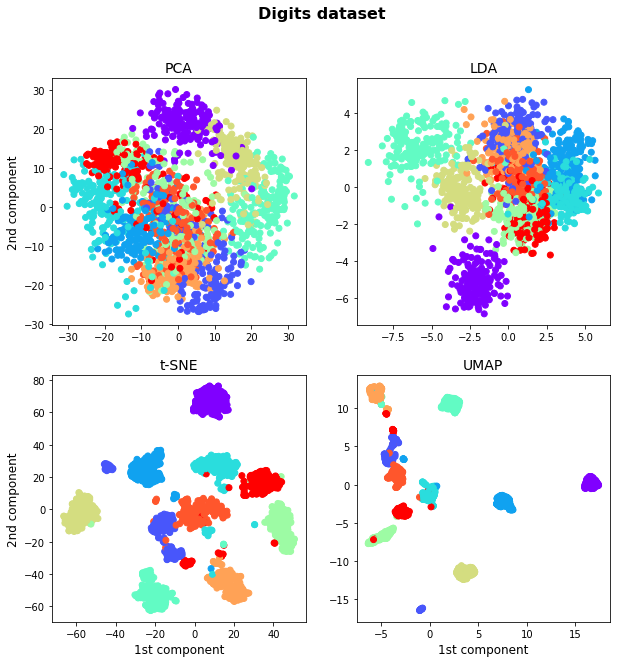

In [2]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from umap import UMAP

import matplotlib.pylab as plt

data_digits = load_digits()

X_digits = data_digits['data']
y_digits = data_digits['target']

X_digits_std = StandardScaler().fit_transform(X_digits) # Superfluous, as features are on the same scale 

plt.subplots(figsize=(10,10))

# PCA 
pca = PCA(n_components=2)
X_digits_pca = pca.fit_transform(X_digits)

plt.subplot(2, 2, 1)
plt.scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], cmap='rainbow', c=y_digits)
plt.ylabel("2nd component", fontsize=12)
plt.title("PCA", fontsize=14)

# LDA
digits_lda = LDA().fit_transform(X_digits, y_digits)

plt.subplot(2, 2, 2)
plt.scatter(digits_lda[:, 0], digits_lda[:, 1], cmap='rainbow', c=y_digits)
plt.title("LDA", fontsize=14)

# TSNE 
tsne = TSNE(n_components=2)
X_digits_tsne = tsne.fit_transform(X_digits)

plt.subplot(2 , 2, 3)
plt.scatter(X_digits_tsne[:, 0], X_digits_tsne[:, 1], cmap='rainbow', c=y_digits)
plt.xlabel("1st component", fontsize=12)
plt.ylabel("2nd component", fontsize=12)
plt.title("t-SNE", fontsize=14)

# UMAP 
X_digits_umap = UMAP().fit_transform(X_digits)

plt.subplot(2, 2, 4)
plt.scatter(X_digits_umap[:, 0], X_digits_umap[:, 1], cmap='rainbow', c=y_digits)
plt.xlabel("1st component", fontsize=12)
plt.title("UMAP", fontsize=14)

plt.suptitle("Digits dataset", fontsize=16, fontweight= 'bold')
plt.show()

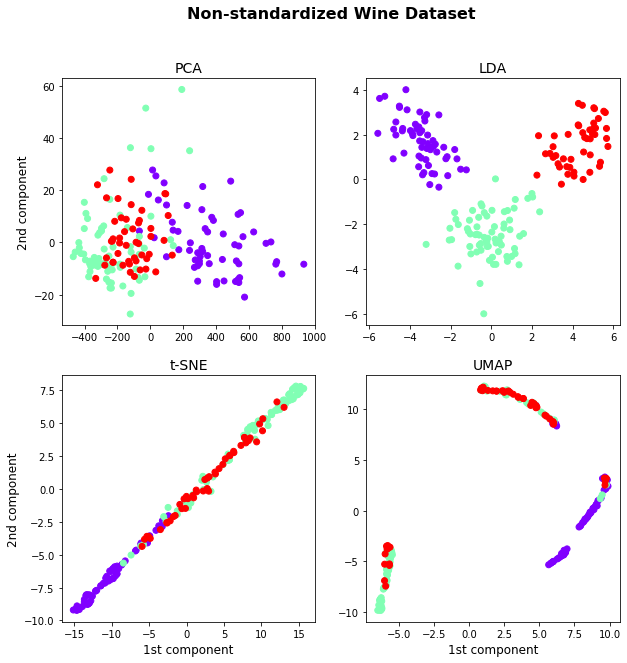

In [2]:
# Non-standardized
data_wine = load_wine()

X_wine = data_wine['data']
y_wine = data_wine['target']

plt.subplots(figsize=(10,10))

# PCA 
pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine)

plt.subplot(2, 2, 1)
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], cmap='rainbow', c=y_wine)
plt.ylabel("2nd component", fontsize=12)
plt.title("PCA", fontsize=14)

# LDA
wine_lda = LDA().fit_transform(X_wine, y_wine)

plt.subplot(2, 2, 2)
plt.scatter(wine_lda[:, 0], wine_lda[:, 1], cmap='rainbow', c=y_wine)
plt.title("LDA", fontsize=14)

# TSNE 
tsne = TSNE(n_components=2)
X_wine_tsne = tsne.fit_transform(X_wine)

plt.subplot(2, 2, 3)
plt.scatter(X_wine_tsne[:, 0], X_wine_tsne[:, 1], cmap='rainbow', c=y_wine)
plt.xlabel("1st component", fontsize=12)
plt.ylabel("2nd component", fontsize=12)
plt.title("t-SNE", fontsize=14)

# UMAP 
X_wine_umap = UMAP().fit_transform(X_wine)

plt.subplot(2, 2, 4)
plt.scatter(X_wine_umap[:, 0], X_wine_umap[:, 1], cmap='rainbow', c=y_wine)
plt.xlabel("1st component", fontsize=12)
plt.title("UMAP", fontsize=14)

plt.suptitle("Non-standardized Wine Dataset", fontsize=16, fontweight= 'bold')
plt.show()

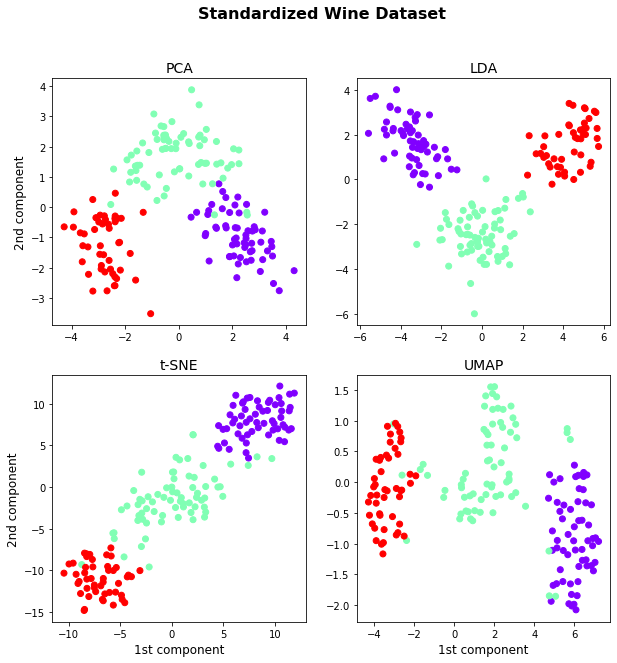

In [3]:
# Standardized
data_wine = load_wine()

X_wine = data_wine['data']
y_wine = data_wine['target']

X_wine_std = StandardScaler().fit_transform(X_wine) # Standardization

plt.subplots(figsize=(10,10))

# PCA 
pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine_std)

plt.subplot(2, 2, 1)
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], cmap='rainbow', c=y_wine)
plt.ylabel("2nd component", fontsize=12)
plt.title("PCA", fontsize=14)

# LDA
wine_lda = LDA().fit_transform(X_wine_std, y_wine)

plt.subplot(2, 2, 2)
plt.scatter(wine_lda[:, 0], wine_lda[:, 1], cmap='rainbow', c=y_wine)
plt.title("LDA", fontsize=14)

# TSNE 
tsne = TSNE(n_components=2)
X_wine_tsne = tsne.fit_transform(X_wine_std)

plt.subplot(2, 2, 3)
plt.scatter(X_wine_tsne[:, 0], X_wine_tsne[:, 1], cmap='rainbow', c=y_wine)
plt.xlabel("1st component", fontsize=12)
plt.ylabel("2nd component", fontsize=12)
plt.title("t-SNE", fontsize=14)

# UMAP 
X_wine_umap = UMAP().fit_transform(X_wine_std)

plt.subplot(2, 2, 4)
plt.scatter(X_wine_umap[:, 0], X_wine_umap[:, 1], cmap='rainbow', c=y_wine)
plt.xlabel("1st component", fontsize=12)
plt.title("UMAP", fontsize=14)

plt.suptitle("Standardized Wine Dataset", fontsize=16, fontweight= 'bold')
plt.show()

There is a large difference in classification after dimensionality reduction for the wine dataset when standardizing. In particular, PCA, t-SNE, and UMAP perform poorly when not standardizing. This is not as evident in the digits dataset, as the features already appear on the same scale. 

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

#### Answer
* In essence, Athey and Imbens (2015) propose splitting your sample such that one can be used for training your decision tree, while the other half is used to attain treatment effects at each split. This prevents data-mining (and possible data-leakage), while also allowing us to *honestly* evaluate model performance. Intuitively, implementing honesty penalizes small leaf nodes that increase variance while rewarding partitions for finding strong heterogeneity in treatment effects. As explained in class, this approach is similar to that of splitting into a training and test set. The idea being that the main interest of Athey and Imbens (2015) is not in predicting a single outcome given some specific covariates, as in traditional regression analysis, but rather to predict the difference in expectations of outcomes, given the same set of covariates. The honest approach ensures that there is no data-leakage and that the estimated local treatment effects are separable from heterogeneity in leaf nodes. 
* The practical implementation is introducing a variant of the typical MSE criterion, referred to as $EMSE_{\tau} = \mathbb{E}[(Y_i - \bar{Y}_i)^{2}-Y_i^2]$, where a penalty for having small leaf nodes is included as this will increase the variance $Y^2$. Practically, this translates into splitting the data into training and estimation sets, while using a criterion that rewards heterogeneity (large leaves or pure splits). Applying the decision tree from the training set to the estimation set will then allow us to determine the treatment effects.  